In [6]:
# imports and defaults
import pandas as pd  
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 14
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [7]:
header_list = ["Time", "Cn2", "CT2", "H_convection", "crosswind",
               "sigCrosswind", "pressure", "temp", "humidity", "pathLength",
               "pathHeight", "correctCn2EO", "correctCn2Sat", "correctCn2Cov",
               "mndCounter", "<XA>(c)", "<YA>(c)", "nSigXA(c)", "nSigYA(c)",
               "corXAYA(c)", "numDgnValid", "numDgnValidCrosswind",
               "numDgnTotal", "channelFlagsCombined", "error"]

scint_data = pd.read_csv("../../SRun/2018-05-06.mnd", header=None,
                            skiprows=35, names=header_list, sep="\t")

# Remove timestamp fluff
scint_data["Time"] = scint_data["Time"].str.replace("PT00H00M59S/", "")
scint_data["Time"] = scint_data["Time"].str.replace("PT00H00M29S/", "")

scint_data['Time'] = pd.to_datetime(scint_data['Time'])

scint_data = scint_data.set_index("Time")
scint_data

,Cn2,CT2,H_convection,crosswind,sigCrosswind,pressure,temp,humidity,pathLength,pathHeight,...,<XA>(c),<YA>(c),nSigXA(c),nSigYA(c),corXAYA(c),numDgnValid,numDgnValidCrosswind,numDgnTotal,channelFlagsCombined,error
Time,,,,,,,,,,,,,,,,,,,,,
2018-05-06 03:53:00+00:00,7.185600e-16,0.000989,17.6,1.05,0.32,939.8,20.8,40,1056,33.05,...,16120.7,13913.4,0.008139,0.008251,0.083,2,2,2,0,0
2018-05-06 03:54:00+00:00,7.530800e-16,0.001037,18.2,1.22,0.05,939.8,20.8,40,1056,33.05,...,16097.2,13894.3,0.007546,0.008124,-0.050,2,2,2,0,0
2018-05-06 03:55:00+00:00,5.909700e-16,0.000814,15.2,1.23,0.07,939.8,20.8,40,1056,33.05,...,16120.8,13919.6,0.007329,0.007526,0.082,2,2,2,0,0
2018-05-06 03:56:00+00:00,7.901700e-16,0.001088,18.9,1.15,0.14,939.8,20.8,40,1056,33.05,...,16062.0,13863.6,0.008034,0.008591,0.021,2,2,2,0,0
2018-05-06 03:57:00+00:00,6.238500e-16,0.000859,15.8,1.21,0.08,939.8,20.8,40,1056,33.05,...,16029.7,13836.7,0.007203,0.007573,0.021,2,2,2,0,0
2018-05-06 03:58:00+00:00,5.570600e-16,0.000767,14.5,1.09,0.02,939.8,20.8,40,1056,33.05,...,16055.0,13850.3,0.006757,0.007210,0.022,2,2,2,0,0
2018-05-06 03:59:00+00:00,6.536300e-16,0.000900,16.4,0.59,0.28,939.8,20.8,40,1056,33.05,...,16047.4,13848.0,0.010618,0.010384,0.492,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-06 13:42:00+00:00,1.326600e-14,0.018265,156.5,7.66,2.06,939.8,20.8,40,1056,33.05,...,14659.6,12631.5,0.035760,0.035912,0.118,2,2,2,0,0


/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


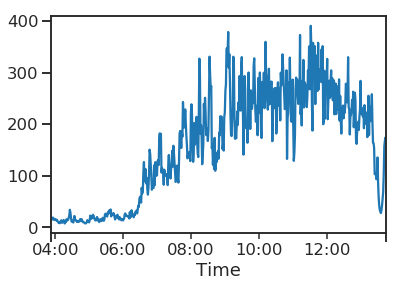

In [8]:
scint_data = scint_data[scint_data["error"] ==0]
scint_data["H_convection"].plot()
